In [1]:
!pip install --quiet openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


In [4]:
import os,openai
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get("op")
openai.api_key = os.getenv("OPENAI_API_KEY")

In [6]:
from openai import OpenAI
client = OpenAI()

kids_emb=client.embeddings.create(
    model="text-embedding-ada-002", #다른 임베딩 모델도 많이 존재함
    input="kids",#kids 입력에 대한 임베딩 값 출력
    encoding_format="float"
)
children_emb=client.embeddings.create(
    model="text-embedding-ada-002",
    input="children",#children 입력에 대한 임베딩 값 출력
    encoding_format="float"
)


In [8]:
kids_emb.data[0].embedding

[0.015689211,
 0.007508708,
 0.009545086,
 -0.008166507,
 -0.019733977,
 0.016850857,
 0.0010348092,
 -0.022687076,
 -0.004251202,
 -0.00015832667,
 0.023330878,
 0.013435898,
 -0.0028061434,
 -0.015311326,
 -0.004940492,
 0.014597544,
 0.03907607,
 0.0020013892,
 0.03711667,
 -0.02296699,
 -0.001631377,
 0.0058047283,
 -0.006067148,
 -0.04405855,
 -0.023050964,
 0.0027081734,
 0.0034062103,
 -0.0038418274,
 0.011371529,
 -0.018250428,
 0.013183976,
 -0.013883762,
 0.010552779,
 -0.022407161,
 -0.033113893,
 -0.008607373,
 -0.017732587,
 -0.02345684,
 -0.00514343,
 0.000989323,
 0.00275191,
 0.004170727,
 0.0032190173,
 -0.00808953,
 -0.0007715145,
 0.004013275,
 -0.034597438,
 -0.0003835704,
 -0.022952994,
 0.004688569,
 0.016794873,
 0.016906839,
 -0.003059816,
 -0.015269339,
 0.0029303555,
 0.0007671408,
 0.0053813574,
 0.0063540605,
 -0.013288943,
 -0.016375002,
 -0.001464303,
 0.002027631,
 -0.01624904,
 0.016556947,
 -0.00923718,
 0.0009184696,
 -0.010503794,
 0.023988677,
 0.008

In [12]:
import numpy as np
def get_embedding(text):
  return np.array(client.embeddings.create(
      model="text-embedding-ada-002",
      input=text,
      encoding_format="float"
  ).data[0].embedding)

In [13]:
kids_embedding=get_embedding("kids")
kids_korean_embedding = get_embedding("아이들")

In [15]:
len(kids_korean_embedding)

1536

In [16]:
a=get_embedding("a")
len(a)

1536

In [17]:
type(a)

numpy.ndarray

**코사인 유사도**란 벡터와 벡터 간의 유사도를 비교할 때 두 벡터 간의 사잇각을 구해서 얼마나 유사한지 수치로 나타낸 것입니다.  
벡터 방향이 비슷할수록 두 벡터는 서로 유사하며, 벡터 방향이 90도 일때는 두 벡터 간의 관련성이 없으며, 벡터 방향이 반대가 될수록 두 벡터는 반대 관계를 보입니다

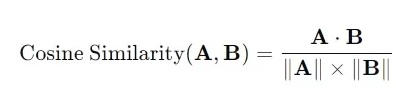

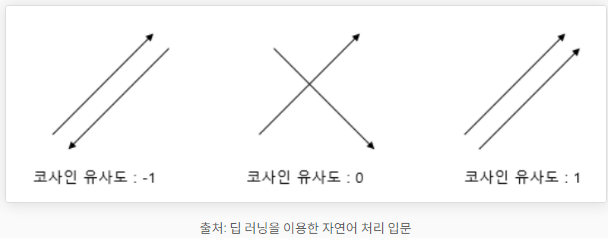

In [18]:
def cosine_sim(vector_a,vector_b):
  dot_product=np.dot(vector_a,vector_b) #벡터 a,b의 내적계산
  norm_a=np.linalg.norm(vector_a) #벡터 a의 길이
  norm_b=np.linalg.norm(vector_b) #벡터 b의 길이
  cosine_similarity=dot_product/(norm_a*norm_b) #내적/길이*길이
  return cosine_similarity

In [19]:
b=cosine_sim(np.array(kids_emb.data[0].embedding),np.array(children_emb.data[0].embedding))

<function print>

In [20]:
b #1에 엄청 가까우니까 두개의 의미가 굉장히 가깝다를 의미함

0.9758287550967883

In [21]:
b=cosine_sim(np.array(kids_emb.data[0].embedding),kids_korean_embedding)
print(b) #둘다 똑같은 의미지만 언어 차이로 값이 작아진듯?

0.8243105416387181


In [22]:
b=cosine_sim(get_embedding("kids"),get_embedding('어린아이들'))
print(b)

0.8172947896689593


In [23]:
b=cosine_sim(get_embedding("kids"),get_embedding('상어'))
print(b)

0.7630442193421898


In [24]:
def get_similarity(w1,w2):
  result=round(cosine_sim(get_embedding(w1),get_embedding(w2)),2)
  print(f"얼마나 가깝나요?? {result}")

get_similarity('학교','school')
get_similarity('bluetooth','school')

얼마나 가깝나요?? 0.86
얼마나 가깝나요?? 0.78
